# Evaluating Classifiers

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X

## Cross-Validation

Our objective is to evaluate the predictions generated by several classifiers for this dataset. It is worth highlighting that in a prediction problem, a model is usually given a dataset of known data on which it is trained (training dataset) and a dataset of unseen data against which the model is tested (testing dataset).

**Cross-validation** is a model validation technique for assessing how the performance of a model will generalize to an independent dataset. The goal of cross-validation is to define a dataset to "test" the model in the training phase. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. Cross-validation exists in many variants, one of which is k-fold cross-validation.

In **k-fold cross-validation**, the original sample is randomly partitioned into k equally sized subsamples. Of the k subsamples, a single subsample is retained as the testing data for evaluating the model and the remaining k−1 subsamples are used as training data. The cross-validation process is then repeated k times (once for each fold), with each of the k subsamples used exactly once as the testing data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and testing, and each observation is used for testing exactly once.

Here, we import the KFold method from scikit-learn, which implements k-fold cross validation. We define a function that, given the feature data, class variable, and classifier method name (with optional parameters), performs k-fold cross-validation. The function returns an array of predictions generated by the classifier, with each element of the array corresponding to one fold of cross-validation.

In [14]:
from sklearn.model_selection import KFold

def run_cv(X, y, clf_class, **kwargs):
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()
    
    #Iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        
        y_pred[test_index] = clf.predict(X_test)
        
    
    return y_pred

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

print "5-Nearest Neighbor:"
print " Accuracy: {:.3f}".format(accuracy(y, run_cv(X, y, KNN, n_neighbors=5)))
print "Multinomial Naive Bayes"
print " Accuracy: {:.3f}".format(accuracy(y, run_cv(X, y, MultinomialNB)))
print "Decision Tree with Info. Gain"
print " Accuracy: {:.3f}".format(accuracy(y, run_cv(X, y, DecisionTreeClassifier, criterion="entropy")))

print "\n"
print "Accuracy_scores:"
print "5-Nearest Neighbor:"
print " Accuracy: {:.3f}".format(accuracy_score(y, run_cv(X, y, KNN, n_neighbors=5)))
print "Multinomial Naive Bayes"
print " Accuracy: {:.3f}".format(accuracy_score(y, run_cv(X, y, MultinomialNB)))
print "Decision Tree with Info. Gain"
print " Accuracy: {:.3f}".format(accuracy_score(y, run_cv(X, y, DecisionTreeClassifier, criterion="entropy")))

5-Nearest Neighbor:
 Accuracy: 0.973
Multinomial Naive Bayes
 Accuracy: 0.920
Decision Tree with Info. Gain
 Accuracy: 0.947


Accuracy_scores:
5-Nearest Neighbor:
 Accuracy: 0.960
Multinomial Naive Bayes
 Accuracy: 0.753
Decision Tree with Info. Gain
 Accuracy: 0.933


## Confusion Matrices

Accuracy can often be a misleading measure of model performance, particularly when the outcomes are not necessarily equal. Instead, it is often preferable to assign different costs to different predictions. A confusion matrix is one way of visualizing the types of predictions made by a classifier.

A **confusion matrix** is a table showing the distribution of predictions generated by a classifier for a specific class. The y-axis of the table corresponds to the "true" class of each observation, while the x-axis corresponds to the class predicted by the classifier.

Here, we generate one confusion matrix for each classifier:

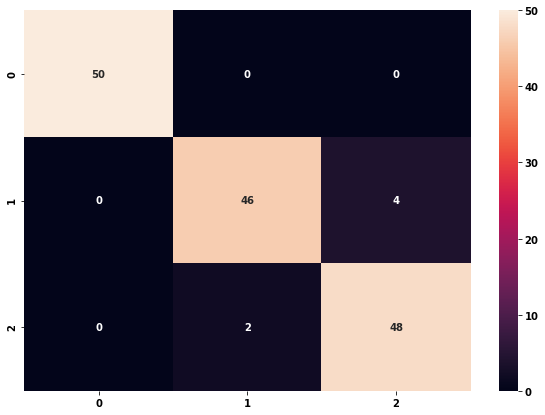

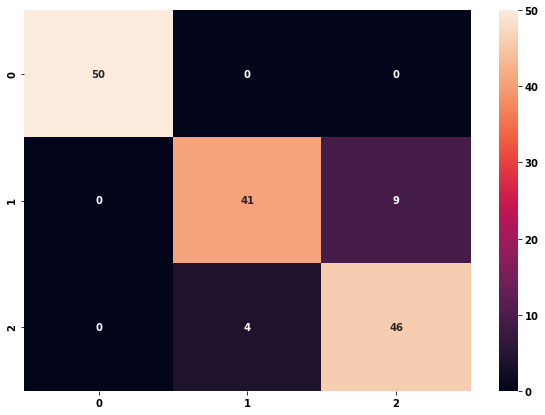

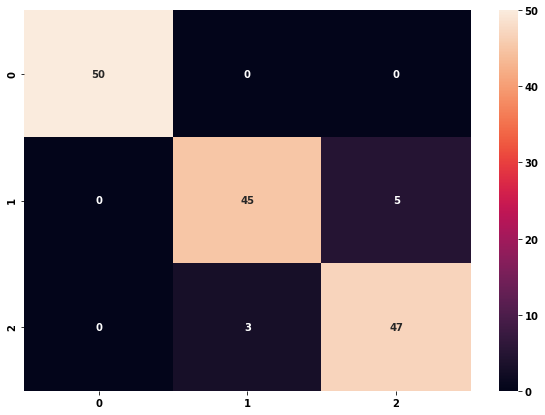

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("5-Nearest Neighbor", confusion_matrix(y, run_cv(X,y,KNN,n_neighbors=5))),
    ("Multinomial Naïve Bayes", confusion_matrix(y, run_cv(X,y,MultinomialNB))),
    ("Decision Tree with Info. Gain", confusion_matrix(y, run_cv(X,y,DecisionTreeClassifier,criterion='entropy')))
]

def draw_confusion_matrices(confusion_matrices, class_names):
    labels = list(class_names)
    
    for cm in confusion_matrices:
        
        df_cm = pd.DataFrame(cm[1], index = [i for i in class_names],
                      columns = [i for i in class_names])
        plt.figure(figsize = (10,7))
        sn.heatmap(df_cm, annot=True)
        

draw_confusion_matrices(confusion_matrices, class_names)

In [17]:
fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
data = pd.read_csv(fileURL, header=None)

In [18]:
data = data.dropna()
data = pd.DataFrame(data)
X = data.iloc[:,:-1]
y = data.iloc[:,-1:].values.ravel()

print type(X)
print type(y)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [19]:
def run_cv_df(X, y, clf_class, **kwargs):
    kf = KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

    #Iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train = y[train_index]
            
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        

        y_pred[test_index]= clf.predict(X_test)
        
    
    return y_pred

Area under the ROC curve : 0.79296148255


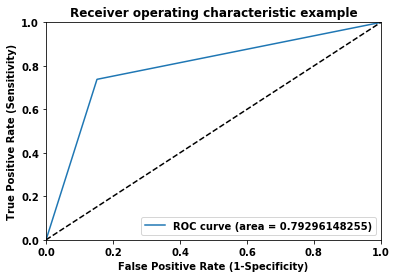

Area under the ROC curve : 0.778231661814


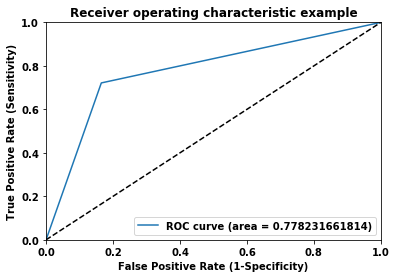

Area under the ROC curve : 0.920462944571


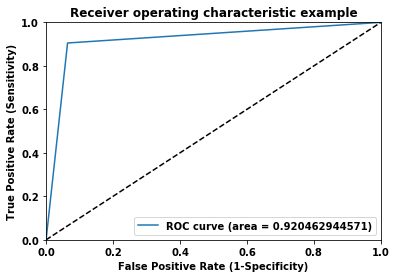

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pylab as pl

#Compute ROC curves
ROC_curves = [
    ("5-Nearest Neighbor", roc_curve(y, run_cv_df(X,y,KNN,n_neighbors=5))),
    ("Multinomial Naïve Bayes", roc_curve(y, run_cv_df(X,y,MultinomialNB))),
    ("Decision Tree with Info. Gain", roc_curve(y, run_cv_df(X,y,DecisionTreeClassifier,criterion='entropy')))
]


def draw_ROC_curves(ROC_curves, class_name):
    for rc in ROC_curves:
        fpr, tpr, thresholds = rc[1]

        #Compute the area under the ROC curve
        roc_auc = auc(fpr, tpr) 
        print ('Area under the ROC curve : {}'.format(roc_auc))
        
        #Plot the ROC curve
        pl.clf()
        pl.plot(fpr, tpr, label='ROC curve (area = {})'.format(roc_auc))
        pl.plot([0,1],[0,1], 'k--')
        pl.xlim([0.0, 1.0])
        pl.ylim([0.0, 1.0])
        pl.xlabel('False Positive Rate (1-Specificity)')
        pl.ylabel('True Positive Rate (Sensitivity)')
        pl.title('Receiver operating characteristic example')
        pl.legend(loc='lower right')
        pl.show()

draw_ROC_curves(ROC_curves, class_names)

In [21]:
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(n_splits=5, shuffle=True)
    y_prob = np.zeros((len(y),2))
    
    #Iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train = y[train_index]
        
        #Initialize a classifier with keyword arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        
        #Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
        
        
    return y_prob

run_prob_cv(X,y, KNN, n_neighbors=5)
        

array([[ 0.4,  0.6],
       [ 0.2,  0.8],
       [ 0. ,  1. ],
       ..., 
       [ 0.4,  0.6],
       [ 0.6,  0.4],
       [ 0.8,  0.2]])

In [22]:
import warnings
warnings.filterwarnings('ignore')

pred_prob = run_prob_cv(X, y, MultinomialNB)
pred_churn = pred_prob[:,1]
is_churn = y == 1

#Number of times a predcition is assigned to an observation
counts = pd.value_counts(pred_churn)

#Calculate true probabilities
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn ==prob])
    true_prob = pd.Series(true_prob)
    
#pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob','count','true_prob']
counts

,pred_prob,count,true_prob
0,1.000000e+00,413,0.900726
1,3.237565e-64,17,0.000000
2,1.000000e+00,14,0.785714
3,1.390657e-65,14,0.000000
4,1.094275e-64,13,0.000000
5,1.794613e-68,13,0.000000
6,2.178276e-65,12,0.000000
7,6.998341e-09,10,0.000000
8,7.512318e-09,8,0.000000
9,3.506361e-09,7,0.000000


In [23]:
# from ggplot import *
# baseline = np.mean(is_churn)
# ggplot(counts, aes(x='pred_prob', y='true_prob', size='count')) + \
#     geom_point(color='blue') + \
#     stat_function(fun = lambda x:x,color='red') +\
#     stat_function(fun = lambda x:baseline, color='green')+\
#     xlim(-0.05, 1.05) + ylin(-0.05,1.05) +\
#     ggtitle("Naive Bayes") + xlab('Predicted probability') + ylab('Relative frequency of outcome')